In [1]:
import numpy as np

from keras import callbacks

In [2]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

from keras.models import Sequential
import keras.optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization

In [3]:
from keras.applications import vgg16

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
train_images_vgg_mod = tf.keras.applications.vgg16.preprocess_input(train_images, data_format="channels_last")
test_images_vgg_mod = tf.keras.applications.vgg16.preprocess_input(test_images, data_format="channels_last")


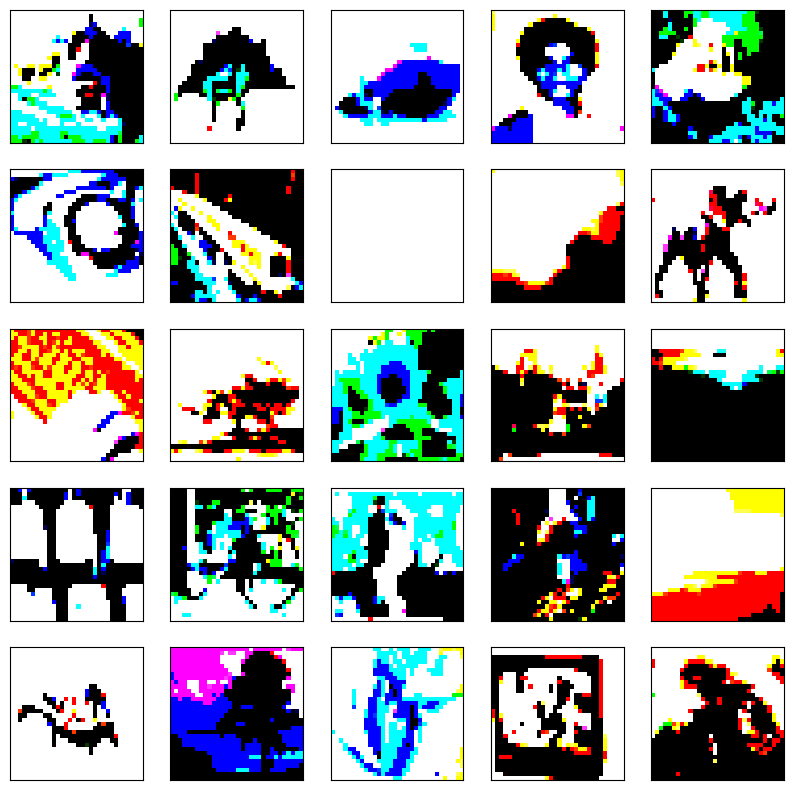

In [6]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_vgg_mod[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
train_labels_mod = tf.keras.utils.to_categorical(train_labels, num_classes=100, dtype='int')
test_labels_mod = tf.keras.utils.to_categorical(test_labels, num_classes=100, dtype='int')



#train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10, dtype='int')
#test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10, dtype='int')

print(train_images.shape)
print(train_labels_mod.shape)

(50000, 32, 32, 3)
(50000, 100)


In [8]:
print(train_labels_mod.shape)

(50000, 100)


In [9]:
train_labels_mod_reshaped = train_labels_mod.reshape(train_images.shape[0], 1,1,100)
test_labels_mod_reshaped = test_labels_mod.reshape(test_images.shape[0], 1,1,100)

In [10]:
#Creating a dataset for improving training speed performance

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_vgg_mod, train_labels_mod_reshaped))

In [12]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images_vgg_mod, test_labels_mod_reshaped))

In [13]:
BATCH_SIZE = 100

In [14]:
#Batching the data
#num_parallel_calls=tf.data.AUTOTUNE

In [15]:
train_dataset_batched = train_dataset.batch(BATCH_SIZE , drop_remainder = True)#, deterministic=False)

In [16]:
test_dataset_batched = test_dataset.batch(BATCH_SIZE, drop_remainder = True)#, deterministic=False)
#Dropping the remainder batch that might be irregular

In [17]:
print(train_dataset_batched)
print(test_dataset_batched)

<_BatchDataset element_spec=(TensorSpec(shape=(100, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(100, 1, 1, 100), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(100, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(100, 1, 1, 100), dtype=tf.int64, name=None))>


In [18]:
'''
model = models.Sequential()
model.add(Conv2D(64,(3,3), activation='relu', padding= "same", input_shape = (32,32,3), data_format="channels_last"))#,  strides = 1, kernel_initializer=keras.initializers.HeNormal(seed=None)))
model.add(Conv2D(64,(3,3), activation='relu', padding= "same", input_shape = (32,32,3), data_format="channels_last"))#, kernel_initializer=keras.initializers.HeNormal(seed=None)))
#model.add(Conv2D(256,(3,3), activation='relu', padding= "same", input_shape = (32,32,3), data_format="channels_last"))
#model.add(BatchNormalization())
#model.add(Conv2D(64,(3,3), activation='relu', padding= "same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(Dropout(rate=0.25))

model.add(Conv2D(128,(3,3), activation='relu', padding= "same",   strides = 1))# , kernel_initializer=keras.initializers.HeNormal(seed=None))) #input_shape = (32,32,3)))
model.add(Conv2D(128,(3,3), activation='relu', padding= "same",   strides = 1))# , kernel_initializer=keras.initializers.HeNormal(seed=None))) #input_shape = (32,32,3)))

#model.add(BatchNormalization())

#model.add(Conv2D(128,(3,3), activation='relu', padding= "same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))
#model.add(Dropout(rate=0.25))

model.add(Conv2D(256,(3,3), activation='relu', padding= "same"))#, kernel_initializer=keras.initializers.HeNormal(seed=None))) # input_shape = (32,32,3)))
model.add(Conv2D(256,(3,3), activation='relu', padding= "same"))#, kernel_initializer=keras.initializers.HeNormal(seed=None))) # input_shape = (32,32,3)))
model.add(Conv2D(256,(3,3), activation='relu', padding= "same"))#, kernel_initializer=keras.initializers.HeNormal(seed=None))) # input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))
#model.add(Dropout(rate=0.25))

model.add(Conv2D(512,(3,3), activation='relu', padding= "same"))#, kernel_initializer=keras.initializers.HeNormal(seed=None))) # input_shape = (32,32,3)))
model.add(Conv2D(512,(3,3), activation='relu', padding= "same"))#, kernel_initializer=keras.initializers.HeNormal(seed=None))) # input_shape = (32,32,3)))
model.add(Conv2D(512,(3,3), activation='relu', padding= "same"))#, kernel_initializer=keras.initializers.HeNormal(seed=None))) # input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))

model.add(Flatten())

model.add(Dense(2048, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(1024, activation='relu'))

#model.add(Dropout(0.5))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

'''


'\nmodel = models.Sequential()\nmodel.add(Conv2D(64,(3,3), activation=\'relu\', padding= "same", input_shape = (32,32,3), data_format="channels_last"))#,  strides = 1, kernel_initializer=keras.initializers.HeNormal(seed=None)))\nmodel.add(Conv2D(64,(3,3), activation=\'relu\', padding= "same", input_shape = (32,32,3), data_format="channels_last"))#, kernel_initializer=keras.initializers.HeNormal(seed=None)))\n#model.add(Conv2D(256,(3,3), activation=\'relu\', padding= "same", input_shape = (32,32,3), data_format="channels_last"))\n#model.add(BatchNormalization())\n#model.add(Conv2D(64,(3,3), activation=\'relu\', padding= "same"))\n#model.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2), strides=2))\n#model.add(Dropout(rate=0.25))\n\nmodel.add(Conv2D(128,(3,3), activation=\'relu\', padding= "same",   strides = 1))# , kernel_initializer=keras.initializers.HeNormal(seed=None))) #input_shape = (32,32,3)))\nmodel.add(Conv2D(128,(3,3), activation=\'relu\', padding= "same",   s

In [19]:
vgg = vgg16.VGG16(include_top=False, weights = 'imagenet', input_shape = (32,32,3))

In [20]:
vgg.trainable = False

In [21]:
inputs = keras.Input(shape=(32, 32, 3))

In [22]:
x = vgg(inputs, training = False)

In [23]:
outputs = Dense(2048, activation='relu')(x)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2048, activation='relu')(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(1024, activation='relu')(outputs)
outputs = Dense(100, activation='softmax')(outputs)

In [24]:
model = keras.Model(inputs, outputs)

In [25]:
model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         Y          
                                                                            
 vgg16 (Functional)          (None, 1, 1, 512)         1471468   N          
                                                       8                    
                                                                            
 dense (Dense)               (None, 1, 1, 2048)        1050624   Y          
                                                                            
 dropout (Dropout)           (None, 1, 1, 2048)        0         Y          
                                                                            
 dense_1 (Dense)             (None, 1, 1, 2048)        4196352   Y          
                                                             

In [26]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=8,
                                        restore_best_weights=True)

In [29]:
opt = keras.optimizers.Adam()#learning_rate=1e-5)# high learning rate - default
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [30]:
history = model.fit(train_dataset_batched, epochs=50, batch_size=BATCH_SIZE, validation_data= test_dataset_batched, callbacks = [earlystopping])

Epoch 1/50
500/500 [==============================] - 21s 25ms/step - loss: 3.7241 - accuracy: 0.1966 - val_loss: 2.7639 - val_accuracy: 0.3099
Epoch 2/50
500/500 [==============================] - 11s 22ms/step - loss: 2.8455 - accuracy: 0.2921 - val_loss: 2.6114 - val_accuracy: 0.3439
Epoch 3/50
500/500 [==============================] - 12s 24ms/step - loss: 2.6818 - accuracy: 0.3233 - val_loss: 2.5223 - val_accuracy: 0.3584
Epoch 4/50
500/500 [==============================] - 12s 24ms/step - loss: 2.5821 - accuracy: 0.3409 - val_loss: 2.4971 - val_accuracy: 0.3692
Epoch 5/50
500/500 [==============================] - 11s 22ms/step - loss: 2.5276 - accuracy: 0.3510 - val_loss: 2.4809 - val_accuracy: 0.3722
Epoch 6/50
500/500 [==============================] - 12s 25ms/step - loss: 2.4764 - accuracy: 0.3637 - val_loss: 2.4598 - val_accuracy: 0.3835
Epoch 7/50
500/500 [==============================] - 13s 25ms/step - loss: 2.4290 - accuracy: 0.3724 - val_loss: 2.4631 - val_accuracy:

100/100 - 1s - loss: 2.4351 - accuracy: 0.4026 - 1s/epoch - 14ms/step
40.25999903678894


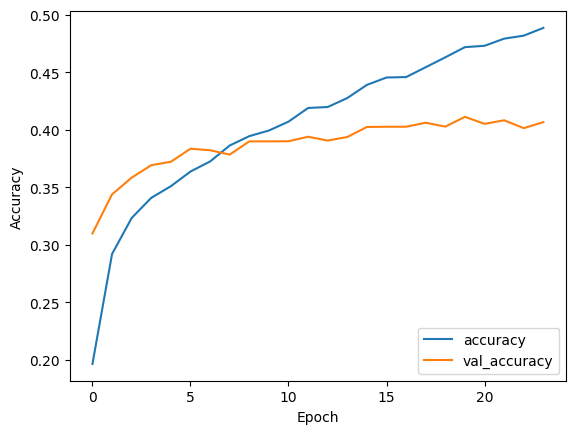

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_dataset_batched, verbose=2)
print(test_acc*100)

Batch size = 50, acc = 80, val_acc = 24.2 --> No dropout, basic CNN like that of last report

In [32]:
#!pip install pyyaml h5py

In [33]:
#!mkdir -p saved_models

In [34]:
#!cd saved_models/

In [35]:
#model.save('multi_CNN_batch50_65_45.keras')

In [36]:
#model.save('multi_CNN_batch50_58_44.keras')

In [44]:
#from google.colab import drive

In [45]:
#drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
#model.save('/content/drive/My Drive/Saved Models/pre_fine_tuning_VGG_transfer.keras')

In [41]:
#!ls

pre_fine_tuning_VGG_transfer.keras  sample_data


In [49]:
vgg.trainable = True

In [50]:
model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         Y          
                                                                            
 vgg16 (Functional)          (None, 1, 1, 512)         1471468   Y          
                                                       8                    
                                                                            
 dense (Dense)               (None, 1, 1, 2048)        1050624   Y          
                                                                            
 dropout (Dropout)           (None, 1, 1, 2048)        0         Y          
                                                                            
 dense_1 (Dense)             (None, 1, 1, 2048)        4196352   Y          
                                                             

In [51]:
opt = keras.optimizers.Adam(learning_rate=1e-5)# high learning rate - default
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [52]:
history_2 = model.fit(train_dataset_batched, epochs=100, batch_size=BATCH_SIZE, validation_data= test_dataset_batched, callbacks = [earlystopping])

Epoch 1/100
500/500 [==============================] - 35s 57ms/step - loss: 2.0238 - accuracy: 0.4613 - val_loss: 2.2894 - val_accuracy: 0.4336
Epoch 2/100
500/500 [==============================] - 29s 58ms/step - loss: 1.8650 - accuracy: 0.4952 - val_loss: 2.2115 - val_accuracy: 0.4512
Epoch 3/100
500/500 [==============================] - 29s 58ms/step - loss: 1.7673 - accuracy: 0.5176 - val_loss: 2.1811 - val_accuracy: 0.4575
Epoch 4/100
500/500 [==============================] - 29s 58ms/step - loss: 1.6682 - accuracy: 0.5358 - val_loss: 2.1223 - val_accuracy: 0.4731
Epoch 5/100
500/500 [==============================] - 29s 59ms/step - loss: 1.6028 - accuracy: 0.5522 - val_loss: 2.0802 - val_accuracy: 0.4846
Epoch 6/100
500/500 [==============================] - 31s 61ms/step - loss: 1.5295 - accuracy: 0.5692 - val_loss: 2.0497 - val_accuracy: 0.4903
Epoch 7/100
500/500 [==============================] - 30s 59ms/step - loss: 1.4713 - accuracy: 0.5824 - val_loss: 2.0454 - val_ac

In [53]:
#model.save('/content/drive/My Drive/Saved Models/post_fine_tuning_VGG_transfer_76_55.keras')